#### 1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule

data: bioresponse.csv, 
description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

#### 2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.

#### 3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

#### 4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
import pandas as pd
import random
random.seed(2310)
import time
%matplotlib inline

### Define nessessary functions

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s


# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b


# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


# optimize

def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

# model

def model(X_train, Y_train, X_test, Y_test, optimize, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print(optimize.__name__ + " train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print(optimize.__name__ + " test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Load dataset

In [3]:
dataset = pd.read_csv("bioresponse.csv")
train_dataset, test_dataset = train_test_split(dataset, train_size=0.75, random_state=2310)
train_Y = train_dataset["Activity"]
del train_dataset["Activity"]
train_X = train_dataset

test_Y = test_dataset["Activity"]
del test_dataset["Activity"]
test_X = test_dataset

### Train model with gradient descent optimization method

In [4]:
start = time.time()
gd_model = model(train_X.to_numpy().T, train_Y.to_numpy(), test_X.to_numpy().T, test_Y.to_numpy(), gradient_descent, print_cost=True)
print(f"Elapsed time: {round(time.time() - start, 2)} s.")

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.042260
Cost after iteration 200: 0.839055
Cost after iteration 300: 0.762029
Cost after iteration 400: 0.715500
Cost after iteration 500: 0.680885
Cost after iteration 600: 0.661389
Cost after iteration 700: 0.534187
Cost after iteration 800: 0.638575
Cost after iteration 900: 0.449824
Cost after iteration 1000: 0.852923
Cost after iteration 1100: 0.469542
Cost after iteration 1200: 0.420921
Cost after iteration 1300: 0.621125
Cost after iteration 1400: 0.754964
Cost after iteration 1500: 0.539321
Cost after iteration 1600: 0.431487
Cost after iteration 1700: 0.395034
Cost after iteration 1800: 0.381446
Cost after iteration 1900: 0.375108
gradient_descent train accuracy: 85.28261642374689 %
gradient_descent test accuracy: 73.77398720682302 %
Elapsed time: 5.89 s.


### Train model with stochastic gradient descent optimization method

In [5]:
# optimize

def sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False, batch_size=128):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
        
    for i in range(num_iterations):
        
        m = X.shape[1]
        rand_idxs = np.random.choice(m, size=batch_size, replace=False)
        X_rand = X[:, rand_idxs]
        
        Y_rand = Y[rand_idxs]
        
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_rand,Y_rand)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
                
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [6]:
start = time.time()
sgd_model = model(train_X.to_numpy().T, train_Y.to_numpy(), test_X.to_numpy().T, test_Y.to_numpy(), sgd, print_cost=True)
print(f"Elapsed time: {round(time.time() - start, 2)} s.")

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.222156
Cost after iteration 200: 1.599264
Cost after iteration 300: 1.439516
Cost after iteration 400: 1.127424
Cost after iteration 500: 0.552909
Cost after iteration 600: 0.473479
Cost after iteration 700: 0.699122
Cost after iteration 800: 0.617113
Cost after iteration 900: 1.263710
Cost after iteration 1000: 0.365123
Cost after iteration 1100: 1.088074
Cost after iteration 1200: 0.511731
Cost after iteration 1300: 0.476473
Cost after iteration 1400: 1.303438
Cost after iteration 1500: 0.213516
Cost after iteration 1600: 0.517018
Cost after iteration 1700: 1.603299
Cost after iteration 1800: 0.441723
Cost after iteration 1900: 0.360227
sgd train accuracy: 78.59936011375756 %
sgd test accuracy: 72.81449893390192 %
Elapsed time: 5.09 s.


### Gradient descent benchmark

In [7]:
def compare_models(optimization_algos, learning_rates=[0.005, 0.01, 0.05, 0.07, 0.1], num_iter=2000):
    
    #models_descriptions = []
    runtimes = []
    
    iterations = range(0, num_iter, 100)
    
    colors = ['b-', 'r-', 'g-']
    
    for l in learning_rates:
        lines = []
        labels = []
        for optimization, color in zip(optimization_algos, colors):
            model_description = model(train_X.to_numpy().T, train_Y.to_numpy(), test_X.to_numpy().T, test_Y.to_numpy(), optimization, num_iterations=num_iter, learning_rate=l, print_cost=False)
            
            line, = plt.plot(iterations, model_description["costs"], color)
            lines.append(line)
            labels.append(optimization.__name__)
            
        plt.xlabel("iterations")
        plt.ylabel("cost")
            
        plt.title(f'Learning rate: {l}')
        plt.legend(lines, labels)
        
        plt.ylim([0, 1])
        plt.xlim([0, int(iterations[-1]*1.1)])
        
        plt.show()

gradient_descent train accuracy: 77.85282616423747 %
gradient_descent test accuracy: 73.77398720682302 %
sgd train accuracy: 77.95947387131176 %
sgd test accuracy: 74.20042643923242 %


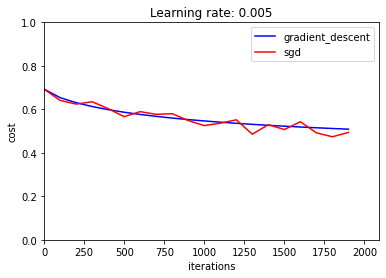

gradient_descent train accuracy: 79.27479559189477 %
gradient_descent test accuracy: 74.30703624733476 %
sgd train accuracy: 79.5236402417348 %
sgd test accuracy: 74.52025586353945 %


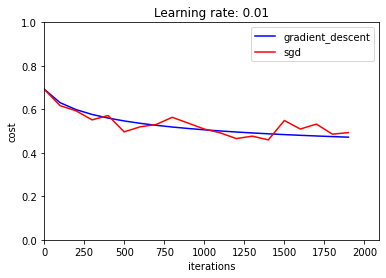

gradient_descent train accuracy: 82.50977603981514 %
gradient_descent test accuracy: 74.4136460554371 %
sgd train accuracy: 82.26093138997511 %
sgd test accuracy: 75.05330490405117 %


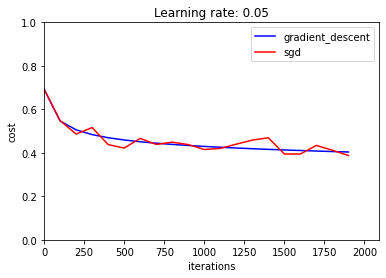

gradient_descent train accuracy: 83.18521151795237 %
gradient_descent test accuracy: 74.30703624733476 %
sgd train accuracy: 83.18521151795237 %
sgd test accuracy: 74.52025586353945 %


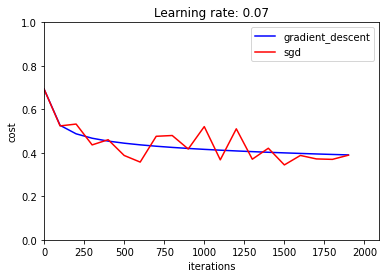

gradient_descent train accuracy: 84.21613935300391 %
gradient_descent test accuracy: 74.52025586353945 %
sgd train accuracy: 84.07394241023817 %
sgd test accuracy: 74.73347547974413 %


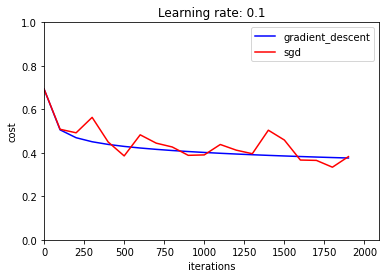

In [8]:
compare_models([gradient_descent, sgd])

Two gradient descent methods shows similar behaviour on all learning rates. However, stochastic descent's  changes abruptly since only a part of the dataset is consideted on one iteration of the optimization. The overall accuracy of SGD is close to regular gradient descent but due to the randomness of SGD the difference could be notable. 

The speedup of the SGD can be crutial while working with huge datasets, however, it can reduce the accuracy of the model.

### Train model with Adam optimization method

In [9]:
def adam(w, b, X, Y, num_iterations, learn_rate, print_cost = False, beta_1=0.9, beta_2=0.999, e=1e-8):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    
    m_w = np.random.random((X.shape[0], 1))
    v_w = np.random.random((X.shape[0], 1))
    m_w_cap = np.random.random((X.shape[0], 1))
    v_w_cap = np.random.random((X.shape[0], 1))
        
    m_b = np.random.random()
    v_b = np.random.random()
    m_b_cap = np.random.random()
    v_b_cap = np.random.random()
    
    n_iter = 0
    for i in range(num_iterations):
        n_iter += 1
        
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        m_w = beta_1 * m_w + (1 - beta_1)*dw
        v_w = beta_2 * v_w + (1 - beta_2)*dw**2
        m_w_cap = m_w / (1 - beta_1**n_iter)
        v_w_cap = v_w / (1 - beta_2**n_iter)

        m_b = beta_1 * m_b + (1 - beta_1)*db
        v_b = beta_2 * v_b + (1 - beta_2)*db**2
        m_b_cap = m_b / (1 - beta_1**n_iter)
        v_b_cap = v_b / (1 - beta_2**n_iter)
        
        # print(b, m_b_cap, v_b_cap,)
        w -= learn_rate * np.divide( m_w_cap, (np.sqrt(v_w_cap) + e) )
        b -= learn_rate * m_b_cap / (np.sqrt(v_b_cap) + e)
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [10]:
start = time.time()
adam_model = model(train_X.to_numpy().T, train_Y.to_numpy(), test_X.to_numpy().T, test_Y.to_numpy(), adam, learning_rate=0.05, print_cost=True)
print(f"Elapsed time: {round(time.time() - start, 2)} s.")

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.914576
Cost after iteration 200: 0.614753
Cost after iteration 300: 0.543932
Cost after iteration 400: 0.507391
Cost after iteration 500: 0.482703
Cost after iteration 600: 0.464461
Cost after iteration 700: 0.450105
Cost after iteration 800: 0.438299
Cost after iteration 900: 0.428369
Cost after iteration 1000: 0.419984
Cost after iteration 1100: 0.412733
Cost after iteration 1200: 0.406251
Cost after iteration 1300: 0.400337
Cost after iteration 1400: 0.394873
Cost after iteration 1500: 0.389776
Cost after iteration 1600: 0.384990
Cost after iteration 1700: 0.380469
Cost after iteration 1800: 0.376177
Cost after iteration 1900: 0.372087
adam train accuracy: 84.50053323853537 %
adam test accuracy: 74.73347547974413 %
Elapsed time: 7.85 s.


### Adam comparison

gradient_descent train accuracy: 77.85282616423747 %
gradient_descent test accuracy: 73.77398720682302 %
sgd train accuracy: 77.92392463562034 %
sgd test accuracy: 73.77398720682302 %
adam train accuracy: 78.95485247067188 %
adam test accuracy: 75.26652452025587 %


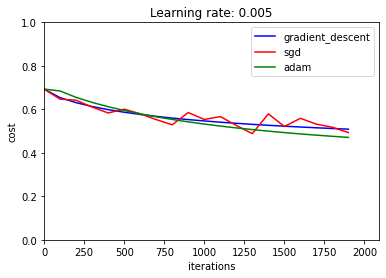

gradient_descent train accuracy: 79.27479559189477 %
gradient_descent test accuracy: 74.30703624733476 %
sgd train accuracy: 79.27479559189477 %
sgd test accuracy: 74.84008528784648 %
adam train accuracy: 80.62566654816922 %
adam test accuracy: 75.05330490405117 %


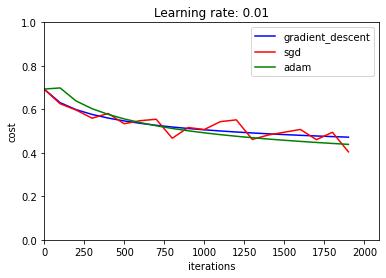

gradient_descent train accuracy: 82.50977603981514 %
gradient_descent test accuracy: 74.4136460554371 %
sgd train accuracy: 82.26093138997511 %
sgd test accuracy: 74.6268656716418 %
adam train accuracy: 84.32278706007821 %
adam test accuracy: 74.4136460554371 %


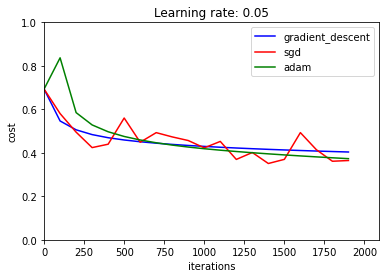

gradient_descent train accuracy: 83.18521151795237 %
gradient_descent test accuracy: 74.30703624733476 %
sgd train accuracy: 83.36295769640952 %
sgd test accuracy: 74.52025586353945 %
adam train accuracy: 85.14041948098117 %
adam test accuracy: 74.4136460554371 %


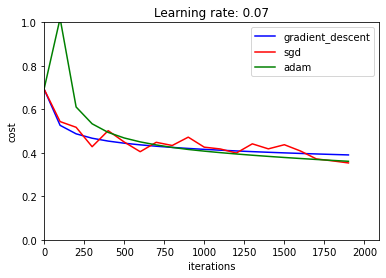

gradient_descent train accuracy: 84.21613935300391 %
gradient_descent test accuracy: 74.52025586353945 %
sgd train accuracy: 83.75399928901528 %
sgd test accuracy: 74.30703624733476 %
adam train accuracy: 85.78030572342695 %
adam test accuracy: 75.69296375266525 %


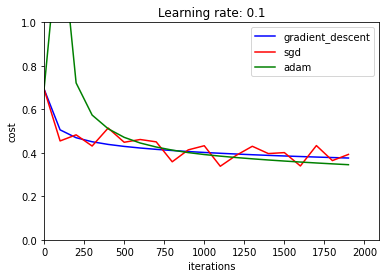

In [12]:
compare_models([gradient_descent, sgd, adam])

Adam method shows more smooth convergence compared to gradient methods. It also show the best accuracy on test dataset in most cases, always outperforming gradient descent. With learning rate 0.07 SGD outperforms Adam due to its randomness.